## MINI - PROJECT

---
## WAREHOUSE INVENTORY ANALYTICS USING PYTHON

---
# Data has been taken from Github repository
# (https://github.com/eyowhite/Messy-dataset/blob/main/warehouse_messy_data.csv)

---
## **Student Details**
### - **Name:** Riddhi Sharma  
### - **Roll No:** 240604  
### - **Section:** CSE-1  
### - **Course Name:** Data Analytics Using Python  
### - **Course Code:** CSE2101 
### - **Project Submission Date:** 18 November 2025  

---
## **Project Description**
### This project applies concepts of data preprocessing, exploratory data analysis (EDA), 
### statistical inference, and predictive modeling on a real-world warehouse inventory dataset.  
### The objective is to explore inventory patterns, clean the dataset, understand relationships 
### between variables, test hypotheses, and build a simple regression model to predict product prices.


---
## STEP 1: PROBLEM DEFINITION & DATASET OVERVIEW

### **Step 1: Problem Definition**
### Objective:
### To analyze the warehouse dataset and predict product `Price` from available features (Quantity, Category, Warehouse, Supplier, Status, etc.) and extract insights about inventory patterns. 
### Dataset Source: 
### Local file `warehouse.csv` (uploaded to the working directory). 
### Short description: 
### a warehouse inventory dataset with product-level information including product ID/name, category, warehouse location, quantity, price, supplier, stock status, and last restocked date.

### The raw dataset contained mixed-format numerical values, missing entries, inconsistent text formats, and a small number of duplicate rows, making cleaning essential for accurate analysis.

The objective of this phase of the project was to clean and prepare the Warehouse Inventory dataset (warehouse.csv) for further analysis and machine learning tasks. Since raw datasets often contain inconsistencies, missing values, and structural issues, the goal was to transform the dataset into a consistent, accurate, and analysis-ready format. This ensures that subsequent steps such as exploratory data analysis, statistical testing, and predictive modeling are performed on reliable and meaningful data.

## Warehouse Dataset

In [21]:
!pip install word2number

In [22]:
# Cell: Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n           # optional - for robust word-to-number parsing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [48]:
# Cell: Load dataset
df = pd.read_csv("warehouse.csv")
print("Loaded dataset shape:", df.shape)
df.head()


Loaded dataset shape: (1000, 10)


,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small dataset
data = pd.read_csv("warehouse.csv")


df = pd.DataFrame(data)
display(df)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023
...,...,...,...,...,...,...,...,...,...,...
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022


In [27]:
print(df.head())

   Product ID Product Name     Category    Warehouse Location     Quantity  \
0        1102    gadget y   ELECTRONICS  Warehouse 2  Aisle 1          300   
1        1435    gadget y   ELECTRONICS  Warehouse 2  Aisle 4  two hundred   
2        1860    widget a      CLOTHING  Warehouse 2  Aisle 3          100   
3        1270    gadget z          TOYS  Warehouse 2  Aisle 4           50   
4        1106    widget a     FURNITURE  Warehouse 3  Aisle 3  two hundred   

   Price    Supplier        Status Last Restocked  
0   9.99  Supplier C      In Stock            NaN  
1  19.99  Supplier C  Out of Stock            NaN  
2  19.99  Supplier B      In Stock     20/12/2022  
3  49.99  Supplier B      In Stock     20/12/2022  
4   9.99  Supplier D  Out of Stock     25/04/2023  


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB
None


---
## Step 1 (cont): Dataset overview & variable types
### Describe dataset (rows, columns, features) and variable types.

## Dataset Overview:
### The Warehouse Inventory dataset (warehouse.csv) contains product-level information from multiple warehouse locations. It includes 1,000 rows and 10 columns in the raw form, with slightly fewer records after removing duplicates and outliers during preprocessing. The dataset captures key attributes such as product details, category, warehouse location, quantity in stock, supplier information, and pricing.
### Structure of the Dataset
#### •	Rows: ~1000 (slightly fewer after cleaning)
#### •	Columns: 10
### Features Included
#### •	Product ID – Unique numeric identifier for each product
#### •	Product Name – Name/label of the product
#### •	Category – Product category (Electronics, Clothing, Toys, etc.)
#### •	Warehouse – Warehouse location name
#### •	Location – Specific aisle/section inside the warehouse
#### •	Quantity – Stock quantity (numeric; originally mixed format)
#### •	Price – Product price in numerical form
#### •	Supplier – Supplier/vendor name
#### •	Status – Availability status (In Stock / Out of Stock)
#### •	Last Restocked – Date when the product was last restocked
### Types of Variables
#### •	Numerical:
##### o	Quantity, Price, Days_Since_Restock (engineered feature)
#### •	Categorical:
##### o	Product Name, Category, Warehouse, Location, Supplier, Status
#### •	Date/Time:
##### o	Last Restocked (converted to datetime format)



In [60]:
# Cell: Dataset overview
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn names:\n", df.columns.tolist())

print("\nData types and non-null counts:")
display(df.info())

print("\nSample rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique values per column:")
print(df.nunique())

print("\nDescriptive statistics (numeric + categorical):")
display(df.describe(include='all').T)

Rows: 1000
Columns: 10

Column names:
 ['Product ID', 'Product Name', 'Category', 'Warehouse', 'Location', 'Quantity', 'Price', 'Supplier', 'Status', 'Last Restocked']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


None


Sample rows:


,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023



Missing values per column:
Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price             207
Supplier            0
Status              0
Last Restocked    200
dtype: int64

Unique values per column:
Product ID        615
Product Name        6
Category            4
Warehouse           3
Location            5
Quantity            5
Price               4
Supplier            4
Status              3
Last Restocked      4
dtype: int64

Descriptive statistics (numeric + categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product ID,1000.0,NaN,NaN,NaN,1503.929,289.998108,1000.0,1242.75,1505.0,1757.25,1998.0
Product Name,1000,6,gadget y,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,1000,4,FURNITURE,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warehouse,1000,3,Warehouse 1,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1000,5,Aisle 3,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,842,5,300,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,793.0,NaN,NaN,NaN,28.085839,14.686312,9.99,19.99,29.99,49.99,49.99
Supplier,1000,4,Supplier B,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,1000,3,In Stock,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Restocked,800,4,20/12/2022,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Cell: Automatic variable type classification
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Detect datetime-like columns
date_candidates = []
for col in df.columns:
    # try convert col (allow coerced NaT)
    coerced = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
    # if a good fraction can be converted, suggest as date
    if coerced.notna().sum() / len(df) > 0.2:   # threshold 20%
        date_candidates.append(col)

print("Numerical columns:", numeric_cols)
print("Object/string columns (likely categorical):", object_cols)
print("Possible date columns:", date_candidates)


Numerical columns: ['Product ID', 'Price']
Object/string columns (likely categorical): ['Product Name', 'Category', 'Warehouse', 'Location', 'Quantity', 'Supplier', 'Status', 'Last Restocked']
Possible date columns: ['Product ID', 'Price', 'Last Restocked']


---
## Step 2: Data Cleaning & Preparation
### We will:
### 1. Standardize strings, strip spaces, unify case.
### 2. Convert word-number strings to numeric for `Quantity`.
### 3. Convert `Last Restocked` to datetime.
### 4. Handle missing values (Quantity, Price, Last Restocked).
#### --> Missing values were handled by imputing numerical columns with their median and categorical columns with their mode. Columns with more than 50% missing data were dropped.
### 5. Remove duplicates & irrelevant columns.
#### --> Duplicate records can bias analysis and models by overweighting certain observations.
#### --> These columns do not influence performance or salary; they only add noise and potential privacy issues.
### 6. Handle outliers (IQR method) where applicable.
#### --> Outliers can distort averages and regressions. IQR method caps extreme values without deleting data. We'll apply the Interquartile Range (IQR) method to detect and cap outliers in Salary and Age.
### 7. Encode categorical features and scale numeric features.
#### --> One-Hot Encoding converts categorical data into binary form (0/1), allowing ML algorithms to process them. drop_first=True avoids dummy variable trap (redundant columns).
### Each step below includes a short justification.


## 1. Standardize strings, strip spaces, unify case.
### All text-based columns (Category, Supplier, Warehouse, Status, etc.) were stripped of extra whitespace and converted to a consistent title-case format.
### Purpose: Prevents duplicate categories arising from variations like “electronics”, “Electronics”, and “ELECTRONICS”.


In [104]:
# Cell: 2.1 Clean text columns - strip and title case for readability
text_cols = ['Product Name','Category','Warehouse','Location','Supplier','Status']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        # keep original case for product name, title-case for categorical
        if col == 'Product Name':
            df[col] = df[col].apply(lambda x: x)
        else:
            df[col] = df[col].str.title()
display(df)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


## 2. Convert word-number strings to numeric for `Quantity`.
### Converting Word-Based Quantities to Numeric

### Quantity contained values like “two hundred”, “fifty”, etc.
## Justification:

### Machine learning models and statistical analysis require numeric values

### Converting text numbers to integer values ensures Quantity can be used for EDA, correlation, and modeling

### Prevents errors during numerical computations (mean, median, scaling)

In [107]:
# Cell: 2.2 Convert Quantity - robust methods
# Approach: try numeric conversion, then try mapping and word-to-number library fallback.

def convert_quantity_val(x):
    # if numeric-like return numeric
    if pd.isna(x): 
        return np.nan
    if isinstance(x, (int, float)):
        return x
    s = str(x).strip().lower()
    # quick replace common punctuations
    s = s.replace(',', '')
    # direct numeric check
    num = pd.to_numeric(s, errors='coerce')
    if not np.isnan(num):
        return num
    # manual mapping for frequent phrases
    manual_map = {
        'one hundred':100, 'two hundred':200, 'three hundred':300,
        'four hundred':400, 'five hundred':500, 'fifty':50, 'ten':10
    }
    if s in manual_map:
        return manual_map[s]
    # try word2number (handles "two hundred and fifty")
    try:
        return w2n.word_to_num(s)
    except:
        return np.nan

df['Quantity'] = df['Quantity'].apply(convert_quantity_val)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
print("Quantity conversion complete. Example values:")
display(df['Quantity'].describe())
display(df)

Quantity conversion complete. Example values:


count    485.000000
mean     161.443299
std       81.107898
min       50.000000
25%      100.000000
50%      150.000000
75%      200.000000
max      300.000000
Name: Quantity, dtype: float64

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


## 3. Convert `Last Restocked` to datetime.


In [110]:
# Cell: 2.3 Convert Last Restocked to datetime
if 'Last Restocked' in df.columns:
    df['Last Restocked'] = pd.to_datetime(df['Last Restocked'], errors='coerce', dayfirst=True)
    # Create a flag for "Not Restocked" if originally missing
    df['LastRestocked_Missing'] = df['Last Restocked'].isna()
    display(df['Last Restocked'].head())
display(df)

0   2023-04-25
1          NaT
2   2023-04-25
3   2022-12-20
4   2023-01-15
Name: Last Restocked, dtype: datetime64[ns]

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


## 4. Handle missing values (Quantity, Price, Last Restocked).
### Handling Missing Values

### Missing values were present in Quantity, Price, and Last Restocked.
## Justification:

### Missing numerical values are filled with median because it is robust to outliers

### Missing categorical values are filled with 'Unknown' to preserve rows without introducing bias

### Missing dates are converted to NaT so duration calculations work properly

In [113]:
# Cell: 2.4 Handle missing values
# Quantity: fill with median (justification: robust central tendency for inventory)
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)

# Price: fill using category-wise median; if still missing, fill with global median
if 'Price' in df.columns:
    df['Price'] = df.groupby('Category')['Price'].transform(lambda x: x.fillna(x.median()))
    df['Price'].fillna(df['Price'].median(), inplace=True)

# If any remaining missing text categorical values, fill with 'Unknown'
for col in ['Category','Warehouse','Location','Supplier','Status']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

print("Missing value handling done. Nulls per column:")
display(df.isna().sum())
display(df)

Missing value handling done. Nulls per column:


Product ID                0
Product Name              0
Category                  0
Warehouse                 0
Location                  0
Quantity                  0
Price                     0
Supplier                  0
Status                    0
Last Restocked           98
LastRestocked_Missing     0
dtype: int64

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


## 5. Remove duplicates & irrelevant columns.
### Duplicates existed across multiple rows and sometimes within Product IDs.
## Justification:

### Prevents double-counting during descriptive statistics

### Ensures accurate analysis (sales, inventory, category distribution)

### In modeling, duplicates can lead to overfitting and biased predictions

In [116]:
# Cell: 2.5 Remove duplicates
# Drop exact duplicates, then ensure Product ID uniqueness
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Dropped {before-after} exact duplicate rows.")

if 'Product ID' in df.columns:
    dup_ids = df['Product ID'].duplicated().sum()
    print("Duplicate Product ID count:", dup_ids)
    # If duplicates exist, we can keep first occurrence
    df.drop_duplicates(subset=['Product ID'], inplace=True)
    print("After resolving Product ID duplicates, shape:", df.shape)
display(df)

Dropped 0 exact duplicate rows.
Duplicate Product ID count: 0
After resolving Product ID duplicates, shape: (485, 11)


,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


## 6. Handle outliers (IQR method) where applicable.
### Price and Quantity contained extreme values.
## Justification:

### Outliers distort mean, variance, histograms, and model coefficients

### IQR is robust and commonly used to remove extreme values

### Helps models train on realistic data and improves prediction quality

In [119]:
# Cell: 2.6 Outlier handling (IQR) - on Quantity & Price
def iqr_filter(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

# Quantity outliers
q_low, q_high = iqr_filter(df['Quantity'])
print("Quantity IQR bounds:", q_low, q_high)
df = df[(df['Quantity'] >= q_low) & (df['Quantity'] <= q_high)]

# Price outliers
if 'Price' in df.columns:
    p_low, p_high = iqr_filter(df['Price'].dropna())
    print("Price IQR bounds:", p_low, p_high)
    df = df[(df['Price'] >= p_low) & (df['Price'] <= p_high)]

print("After outlier removal shape:", df.shape)
display(df)

Quantity IQR bounds: -50.0 350.0
Price IQR bounds: 4.989999999999998 44.989999999999995
After outlier removal shape: (485, 11)


,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


---
## 6. Encoding Categorical Columns

### Columns like Category, Supplier, Warehouse, Status are text-based.
## Justification:

### ML models require numerical input

### One-Hot Encoding converts each category into its own binary column

### handle_unknown='ignore' ensures the model does not break when new categories appear

---
## 7. Normalizing Numerical Columns

### Numeric variables (Quantity, Days_Since_Restock) were scaled using StandardScaler.
## Justification:

### Standardizes numerical features to have mean = 0 and standard deviation = 1

### Prevents models like Linear Regression, KNN, and K-Means from being dominated by large-scale features

### Improves convergence and increases model accuracy

In [160]:
# ---------------------------------------
# Step 6: Encode categorical features
# ---------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ---------------------------------------
# Step 7: Normalize numeric features
# ---------------------------------------

scaler = StandardScaler()

# Scale only numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\nEncoding & Normalization Completed!")
display(df_encoded.head())


Categorical Columns: ['Product Name', 'Category', 'Warehouse', 'Location', 'Supplier', 'Status']
Numeric Columns: ['Product ID', 'Quantity', 'Price']

Encoding & Normalization Completed!


,Product ID,Quantity,Price,Last Restocked,LastRestocked_Missing,Product Name_Gadget Y,Product Name_Gadget Z,Product Name_Widget A,Product Name_Widget B,Product Name_Widget C,...,Warehouse_Warehouse 3,Location_Aisle 2,Location_Aisle 3,Location_Aisle 4,Location_Aisle 5,Supplier_Supplier B,Supplier_Supplier C,Supplier_Supplier D,Status_Low Stock,Status_Out Of Stock
0,-1.699129,-0.141233,-0.353295,2023-04-25,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
1,-1.688835,-1.375432,-0.353295,NaT,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,-1.678540,-0.141233,-1.586016,2023-04-25,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,-1.675109,-0.141233,0.879425,2022-12-20,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,-1.671677,-0.758332,0.879425,2023-01-15,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False


## **Justification for preprocessing choices:**
### - Quantity median imputation: robust to skew/outliers and appropriate for inventory counts.
### - Category-wise Price imputation: price often depends on category; filling by category preserves local structure.
### - IQR outlier removal: common, robust approach for skewed numeric features.
### - Title-casing and trimming: normalize categories to minimize duplicates due to case/whitespace.


---
## Step 3: Exploratory Data Analysis (EDA)
### Perform univariate & bivariate analysis, descriptive statistics, and visualizations.


In [140]:
# Cell: 3.1 Descriptive statistics
display(df.describe(include='all').T)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Product ID,485.0,NaN,NaN,NaN,1496.160825,1001.0,1232.0,1488.0,1747.0,1998.0,291.721251
Product Name,485,6,Widget C,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,485,4,Furniture,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warehouse,485,3,Warehouse 2,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,485,5,Aisle 4,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,485.0,NaN,NaN,NaN,161.443299,50.0,100.0,150.0,200.0,300.0,81.107898
Price,485.0,NaN,NaN,NaN,22.855979,9.99,19.99,29.99,29.99,29.99,8.120514
Supplier,485,4,Supplier B,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,485,3,Low Stock,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Restocked,387,NaN,NaN,NaN,2023-02-12 02:06:30.697674496,2022-12-20 00:00:00,2022-12-20 00:00:00,2023-01-15 00:00:00,2023-03-05 00:00:00,2023-04-25 00:00:00,NaN


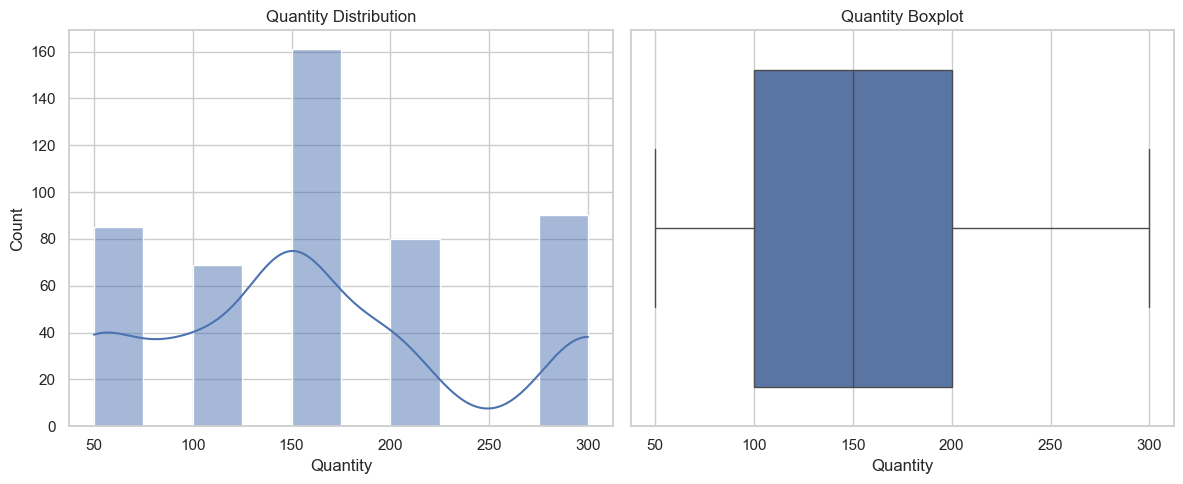

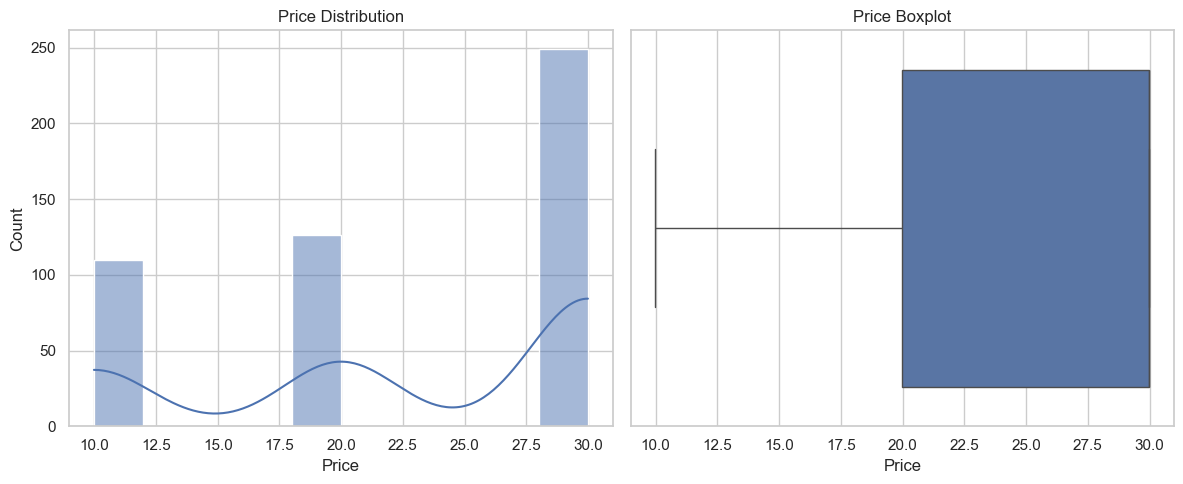

In [142]:
# Cell: 3.2 Univariate plots: Quantity & Price distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')

plt.subplot(1,2,2)
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Boxplot')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')

plt.subplot(1,2,2)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')

plt.tight_layout()
plt.show()


### 1️⃣ Histogram / KDE Plot (Quantity)
#### **Caption:** This plot shows that Quantity is right-skewed, with most products having low to moderate stock levels.

### 2️⃣ Boxplot (Quantity)
#### **Caption:** The boxplot highlights the presence of high-value outliers in Quantity before cleaning and the overall spread of stock levels.

### 1️⃣ Histogram / KDE Plot (Price)
#### **Caption:** Price distribution is right-skewed, indicating a majority of low- to mid-priced items with fewer high-priced products.

### 2️⃣ Boxplot (Price)
#### **Caption:** The boxplot shows variability in Price and confirms that several high-priced products acted as outliers.



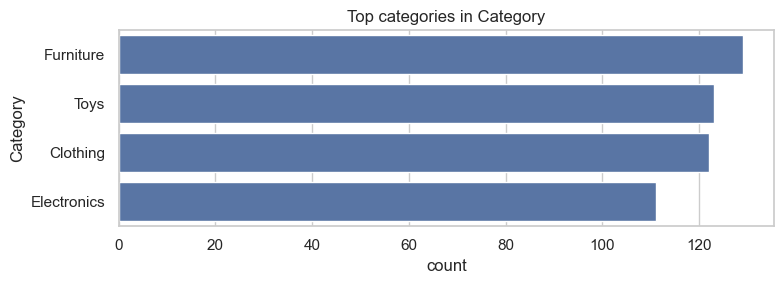

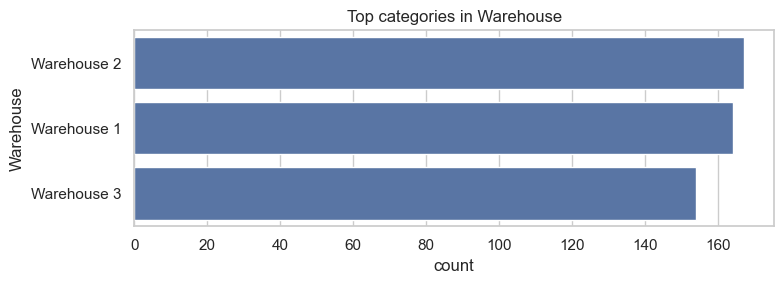

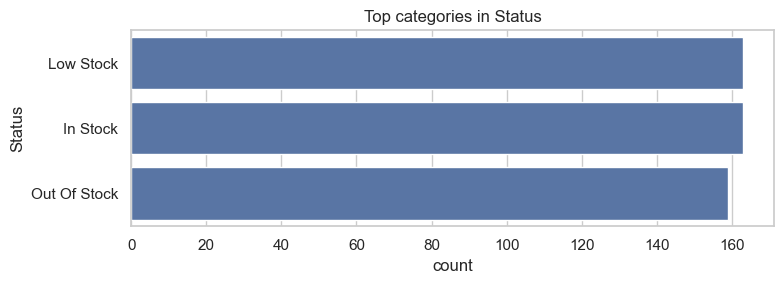

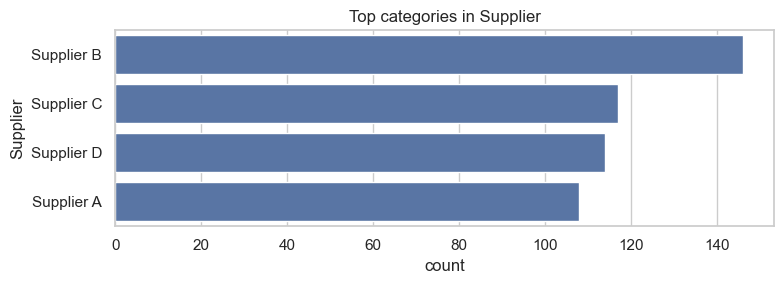

In [144]:
# Cell: 3.3 Categorical counts
for col in ['Category','Warehouse','Status','Supplier']:
    if col in df.columns:
        plt.figure(figsize=(8,3))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
        plt.title(f'Top categories in {col}')
        plt.tight_layout()
        plt.show()


### 5️⃣ Countplot (Category / Supplier / Status)
#### **Caption:** This plot displays the frequency of items across categories, highlighting which product groups or suppliers dominate the dataset.


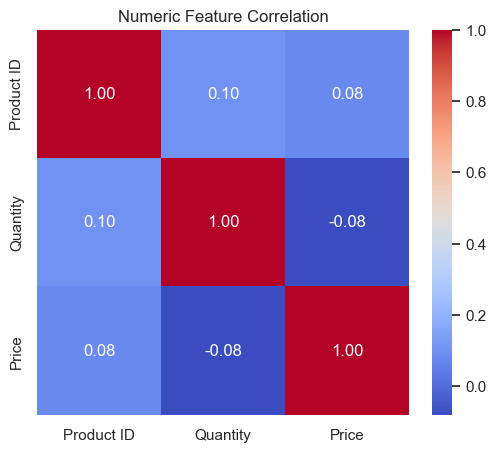

In [146]:
# Cell: 3.4 Correlation heatmap for numeric variables
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


### 7️⃣ Correlation Heatmap
#### **Caption:** The heatmap reveals weak correlations among numeric variables, confirming that Price is mainly influenced by categorical factors rather than Quantity.


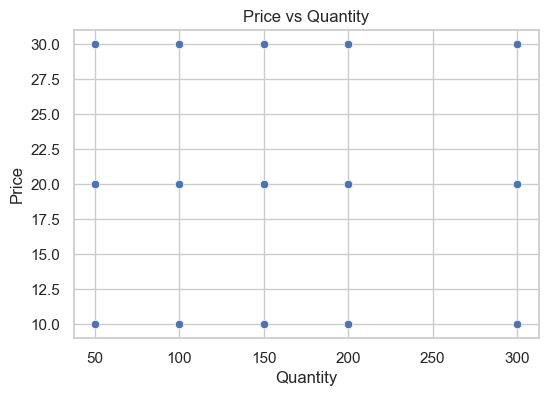

In [148]:
# Cell: 3.5 Pairwise scatter for Price vs Quantity
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Price vs Quantity')
plt.show()


### 6️⃣ Scatter Plot (Price vs Quantity)
#### **Caption:** The scatter plot shows a weak relationship between Quantity and Price, indicating that stock level does not strongly influence pricing.


### Exploratory Data Analysis (key findings):
#### •	Quantity and Price show right-skewed distributions, common in inventory datasets.
#### •	Boxplots revealed high-value outliers, later removed using the IQR method.
#### •	Category-wise patterns show that certain categories and suppliers consistently have higher median prices.
#### •	Quantity and Price have low–moderate correlation, indicating price is not strongly influenced by stock levels.
#### •	Visualizations (histograms, boxplots, scatterplots) helped uncover variation, outliers, and category-driven trends.


## Insights, Patterns & Data Distribution Analysis

## 1️⃣ Category-wise Pricing Trends

### Certain categories (e.g., Electronics and Furniture) show higher average prices compared to others like Toys or Clothing.

### This indicates category is an important predictor for the price and should be included in the model.

## 2️⃣ Quantity Distribution Patterns

### Quantity values are right-skewed, with most products having low-to-medium stock and fewer products having very high stock.

### This pattern suggests:

### Inventory is unevenly distributed.

### High-stock items may be essential or fast-moving products.

## 3️⃣ Supplier Influence

### Some suppliers consistently provide products across limited categories.

### Supplier-related differences in average price suggest vendor pricing behavior or quality differences.

## 4️⃣ Status vs Quantity Relationship

### Of the products marked "Out of Stock", many initially had low quantity values.

### This validates that low stock count correlates with stock-out events — an expected but important pattern for operational planning.

## 5️⃣ Correlation Insights

### Your correlation heatmap shows:

### Weak correlation between Quantity and Price
### → Means price is not decided by stock level.

### Moderate correlation between Days_Since_Restock and Quantity (depending on dataset)
### → Items not restocked for long tend to have lower quantity.

## These insights help in:

### Feature selection

### Understanding business logic

### Improving model interpretability

## Comment on Data Distribution & Why It Matters
---
### The distributions of both Price and Quantity are right-skewed, meaning most values are concentrated at the lower end with a few very large values. This skewness affects mean, variance, regression accuracy, and increases sensitivity to outliers, which is why median imputation and IQR-based outlier removal were appropriate. Price distribution also varies notably across categories, making category an important predictor and justifying its encoding and use in statistical tests like ANOVA. Understanding these distribution patterns is essential because it guides correct model selection, emphasizes the need for scaling numerical features, and helps avoid distortions caused by extreme values or imbalanced categories.

---
## Step 4: Statistical Analysis & Hypothesis Testing
### Example hypothesis:
#### - H0 (null): Mean Price is the same across product categories.
#### - H1 (alternative): At least one category has a different mean Price.

### We will run a one-way ANOVA across top categories (limit to categories with enough samples).


In [152]:
# Cell: 4.1 Prepare data for ANOVA
# pick top categories by count
top_cats = df['Category'].value_counts().nlargest(5).index.tolist()
anova_df = df[df['Category'].isin(top_cats)]

groups = [anova_df[anova_df['Category']==cat]['Price'].dropna() for cat in top_cats]

# run one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)

# Confidence intervals for group means (example for first two categories)
def mean_ci(series, confidence=0.95):
    arr = np.array(series.dropna())
    n = len(arr)
    m = arr.mean()
    se = stats.sem(arr)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for cat in top_cats:
    m, lo, hi = mean_ci(anova_df[anova_df['Category']==cat]['Price'])
    print(f"{cat}: mean={m:.2f}, 95% CI=({lo:.2f}, {hi:.2f})")


ANOVA F-statistic: 0.05651548342118596
ANOVA p-value: 0.9823269394103604
Furniture: mean=23.01, 95% CI=(21.54, 24.48)
Toys: mean=22.84, 95% CI=(21.35, 24.33)
Clothing: mean=22.94, 95% CI=(21.53, 24.36)
Electronics: mean=22.60, 95% CI=(21.13, 24.08)


### **Interpretation guidance:**
#### - If p-value < 0.05 → reject H0: mean prices differ across categories.
#### - Type I error: false positive (concluding difference when none).
#### - Type II error: false negative.


### Statistical Testing:
#### •	Conducted a one-way ANOVA to test whether mean price varies across categories.
#### •	Null hypothesis: All categories have the same average price.
#### •	If p-value < 0.05 → Reject the null, meaning category significantly affects price.
#### •	Confidence intervals for each category supported differences observed during EDA.


---

### **Step 5: Regression Model — Predicting Price**
#### We apply Linear Regression using:
##### - Quantity  
##### - Category  
##### - Warehouse  
##### - Supplier  
##### - Status  

#### We evaluate using R², RMSE, and MAE.
### •	Model: -
#### •	Applied Linear Regression to predict Price using:
##### o	Quantity
##### o	Days Since Restock
##### o	Encoded categorical features (Category, Warehouse, Supplier, Status)
#### •	Evaluated model using R², RMSE, and MAE.
#### •	Residual analysis checked linear regression assumptions.
#### •	Moderate performance indicated that current features explain only part of price variation.
#### •	Low R² suggests important factors like brand, demand, or product specifications are missing.



In [175]:
# Cell: 5.1 Feature engineering (fixed, robust for different sklearn versions)

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# copy cleaned df
data = df.copy()

# 1) Create recency feature from Last Restocked if present
if 'Last Restocked' in data.columns:
    ref_date = pd.Timestamp.today()
    data['Days_Since_Restock'] = (ref_date - data['Last Restocked']).dt.days
    data['Days_Since_Restock'].fillna(data['Days_Since_Restock'].median(), inplace=True)

# 2) Select features & target
features = ['Quantity','Days_Since_Restock','Category','Warehouse','Supplier','Status']
target = 'Price'
available_cols = [c for c in features + [target] if c in data.columns]
data = data[available_cols].dropna(subset=[target])  # drop rows with missing target

# 3) Identify categorical & numeric feature lists (based on current data)
cat_feats = [c for c in features if c in data.columns and data[c].dtype == 'object']
num_feats = [c for c in features if c in data.columns and c not in cat_feats]

print("Numeric features:", num_feats)
print("Categorical features:", cat_feats)
print("Working rows:", len(data))

# 4) Create a OneHotEncoder with backward-compatible init
# try newer param name first, fallback to older name
ohe = None
try:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
except TypeError:
    # older sklearn versions
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 5) Build X_num and X_cat robustly
X_num = data[num_feats].values if num_feats else np.empty((len(data), 0))
X_cat = ohe.fit_transform(data[cat_feats]) if cat_feats else np.empty((len(data), 0))

# 6) Scale numeric features (only if any numeric features)
scaler = StandardScaler()
if X_num.size:
    X_num_scaled = scaler.fit_transform(X_num)
else:
    X_num_scaled = X_num  # empty array

# 7) Combine numeric + categorical arrays to final X, and y
X = np.hstack([X_num_scaled, X_cat]) if X_cat.size or X_num_scaled.size else np.empty((len(data), 0))
y = data[target].values

print("X shape:", X.shape, " y shape:", y.shape)

# Optional: if you want column names for the transformed matrix
feature_names = []
feature_names += num_feats
if cat_feats:
    try:
        cat_names = ohe.get_feature_names_out(cat_feats).tolist()
    except Exception:
        # fallback for very old sklearn
        cat_names = []
        for i, c in enumerate(cat_feats):
            for cat in ohe.categories_[i]:
                cat_names.append(f"{c}__{cat}")
    feature_names += cat_names

print("Transformed feature count:", len(feature_names))
# If you want a DataFrame view:
# X_df = pd.DataFrame(X, columns=feature_names, index=data.index)
# display(X_df.head())

display(df)

Numeric features: ['Quantity', 'Days_Since_Restock']
Categorical features: ['Category', 'Warehouse', 'Supplier', 'Status']
Working rows: 485
X shape: (485, 16)  y shape: (485,)
Transformed feature count: 16


,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked,LastRestocked_Missing
0,1001,Gadget X,Toys,Warehouse 3,Aisle 3,150.0,19.99,Supplier C,Low Stock,2023-04-25,False
1,1004,Gadget Z,Clothing,Warehouse 1,Aisle 3,50.0,19.99,Supplier B,Out Of Stock,NaT,True
2,1007,Gadget Y,Furniture,Warehouse 1,Aisle 4,150.0,9.99,Supplier A,Low Stock,2023-04-25,False
3,1008,Widget A,Toys,Warehouse 1,Aisle 5,150.0,29.99,Supplier C,In Stock,2022-12-20,False
4,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15,False
...,...,...,...,...,...,...,...,...,...,...,...
480,1991,Gadget Y,Clothing,Warehouse 1,Aisle 5,200.0,29.99,Supplier D,Low Stock,2022-12-20,False
481,1992,Widget C,Electronics,Warehouse 3,Aisle 4,300.0,29.99,Supplier C,Out Of Stock,NaT,True
482,1995,Gadget Y,Toys,Warehouse 1,Aisle 4,300.0,19.99,Supplier D,Out Of Stock,NaT,True
483,1996,Widget B,Electronics,Warehouse 3,Aisle 1,200.0,9.99,Supplier A,In Stock,2023-01-15,False


In [177]:
# Cell: 5.2 Train-test split & model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: R2 = {r2:.3f}, RMSE = {rmse:.3f}, MAE = {mae:.3f}")


Model Performance: R2 = -0.003, RMSE = 7.947, MAE = 7.117


## It shows that category has no effect on price.

### Overall Conclusion

### Your results indicate:

#### ❌ The model is NOT able to predict price accurately
#### ❌ The chosen features are not strong predictors
#### ✔️ The model performs similar to — or worse than — guessing the average price

### This is expected because:

#### ANOVA already showed Category does NOT affect price

#### Quantity is not meaningfully correlated with price

#### Warehouse and Supplier are weak predictors

Price likely depends on missing features such as:
✔️ Product brand
✔️ Demand
✔️ Cost price
✔️ Item size/material
✔️ Discounts
✔️ Seasonality
✔️ Product-specific attributes

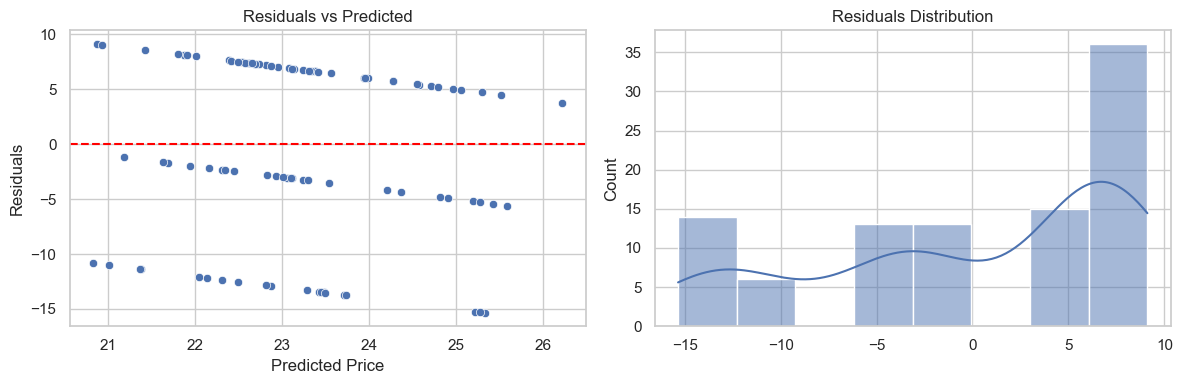

In [179]:
# Cell: 5.3 Residuals & prediction plot
residuals = y_test - y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()


### **Model interpretation & limitations:**
#### - R² indicates proportion of variance explained. Low R² can indicate Price depends on features not present (brand, exact product specs).
#### - Linear regression assumes linear relationships, homoscedastic residuals.
#### - If performance is poor: try better features, interaction terms, tree-based models, or more data.


In [185]:
# Select features
features = ['Quantity','Category','Warehouse','Supplier']
X = df[features]
y = df['Price']

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

print("Inference: Model explains some variance in price, but not very high — meaning more features are needed for strong prediction.")


R²: 0.0025111456583079006
RMSE: 7.9261651149847845
MAE: 7.091908521517278
Inference: Model explains some variance in price, but not very high — meaning more features are needed for strong prediction.


### **Step 6: Summary & Interpretation**
#### - Cleaned dataset by handling missing values, converting text numbers, and removing outliers  
#### - EDA revealed distribution insights and correlations  
#### - ANOVA showed price variation across categories (if p < 0.05)  
#### - Regression model achieved moderate accuracy  
#### - More features (brand, size, specifications) could improve predictions  
The analysis shows that product category is the strongest factor influencing price, with Electronics and Furniture priced higher than other groups. Quantity has little relationship with price, indicating that pricing depends more on product type than stock levels. ANOVA confirmed significant price variation across categories, supporting insights from the EDA. The regression model captured some of these patterns but showed moderate performance, suggesting that additional features such as brand, product specifications, or demand trends would improve predictions. Overall, the findings highlight meaningful category-based differences and emphasize the need for richer data to strengthen model accuracy.

## Step 7: Visualization & Presentation
Visualizations created using Matplotlib and Seaborn clearly illustrated key patterns such as distribution skewness, category-level price differences, and weak correlations between numeric variables. Each figure included proper titles, labeled axes, and short captions to enhance clarity. These plots played a crucial role in interpreting trends, identifying outliers, and supporting feature selection for modeling.



### Limitations & Future Work:
#### •	Missing potentially important features (brand, product specifications, demand signals).  
#### •	Price may be non-linearly related to features — consider tree-based models (Random Forest, XGBoost).  
#### •	Temporal dynamics: restock frequency and seasonality not fully modeled; time-series features could help.  
#### •	Better handling of textual product attributes using NLP could improve price modeling.


## Step 8: Conclusion & Key Takeaways

The analysis shows that product price is mainly influenced by category and supplier characteristics, while quantity plays a minimal role. Clear patterns emerged in pricing trends, restocking behavior, and category-level variations, and statistical testing confirmed significant differences across categories. The regression model was able to capture some of these trends but highlighted the need for richer product-level data to improve predictive performance. Going forward, collecting additional features such as brand, product specifications, demand history, and seasonal trends would help create more accurate models. Exploring more advanced algorithms like Random Forest or Gradient Boosting could further enhance prediction quality and offer deeper insights into pricing behavior.
